In [410]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

In [411]:
df_rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [412]:
df_rt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [413]:
df_rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding="cp1252")

In [414]:
df_rt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [415]:
df_rt = df_rt1.merge(df_rt2, how='inner', on='id')

In [416]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [417]:
df_rt['box_office'] = df_rt['box_office'].str.replace('[{}]'.format(string.punctuation), '')

In [418]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: float(x))

In [419]:
df_rt['runtime'] = df_rt['runtime'].str.strip('minutes')

In [421]:
df_rt['theater_date'] = pd.to_datetime(df_rt['theater_date'], )

In [422]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [423]:
ratings = list(df_rt['rating_y'].value_counts().index[0:186])

In [424]:
ratings

['3/5',
 '4/5',
 '3/4',
 '2/5',
 '2/4',
 '2.5/4',
 '3.5/4',
 '3.5/5',
 '5/5',
 'B',
 '1/5',
 '1.5/4',
 '4/4',
 '2.5/5',
 'B+',
 '1/4',
 'B-',
 'C',
 'C+',
 '4.5/5',
 '7/10',
 'A-',
 '8/10',
 'C-',
 '6/10',
 '1.5/5',
 'A',
 '5/10',
 'D',
 '9/10',
 '4/10',
 'D+',
 '0/5',
 '8',
 '3/10',
 '1',
 '0/4',
 '7',
 'F',
 '0.5/4',
 'D-',
 '6',
 'A+',
 '2/10',
 '7.5/10',
 '0.5/5',
 '5',
 '8.5/10',
 '6.5/10',
 '4',
 '3',
 '9',
 '1/10',
 '5.5/10',
 '3.0/4',
 '4.5/10',
 '3.5',
 '9.5/10',
 '3/6',
 '3.0/5',
 '2.0/5',
 '4.0/4',
 '2',
 '5.0/5',
 '2.1/2',
 '4/6',
 '2/6',
 '2.5',
 '6/8',
 '2.7',
 '4.0/5',
 '0',
 '7.1/10',
 '6.0/10',
 '2.5/10',
 '5.9/10',
 'R',
 '8.2/10',
 '1.5',
 '3.7',
 '5.0/10',
 '2.2',
 '4.5',
 '2.0/4',
 '8.0/10',
 '7.4/10',
 '0/10',
 '3.5/10',
 '6.8/10',
 '7.2/10',
 '7.9/10',
 '5.5/5',
 '5/6',
 '8.9/10',
 '1/6',
 '3.2',
 '1.5/10',
 '8.4/10',
 '7.7/10',
 '9.2/10',
 '1.0/4',
 '3.8/5',
 '4.7',
 '3.3/5',
 '2.4/5',
 '8.2',
 '3.0',
 '2/2',
 '4.9/10',
 '4.8',
 '8.1/10',
 '3.7/5',
 '8.8/10',
 '

In [425]:
def standardize(rating):
    if rating.endswith('5') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-2:])) * 100
    elif rating.endswith('5') and '/' in rating:
        return (float(rating[0]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating:
        return (float(rating[0]) / float(rating[-2:])) * 100
    elif rating == 'A+':
        return 98
    elif rating == 'A':
        return 95
    elif rating == 'A-':
        return 92
    elif rating == 'B+':
        return 88
    elif rating == 'B':
        return 85
    elif rating == 'B-':
        return 82
    elif rating == 'C+':
        return 78
    elif rating == 'C':
        return 75
    elif rating == 'C-':
        return 72
    elif rating == 'D+': 
        return 68
    elif rating == 'D':
        return 65
    elif rating == 'D-':
        return 62
        

In [426]:
standardized_list = []
for rating in ratings:
    new_rating = standardize(rating)
    standardized_list.append(new_rating)

In [427]:
standardized_list.index(110.00000000000001)

91

In [428]:
df_rt['rating_y'] = df_rt['rating_y'].apply(standardize)

In [429]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [430]:
df_rt['rating_y']

0        60.0
6        75.0
7        40.0
11       82.0
13       85.0
         ... 
54424    30.0
54428    20.0
54429    40.0
54430    50.0
54431    60.0
Name: rating_y, Length: 26352, dtype: float64

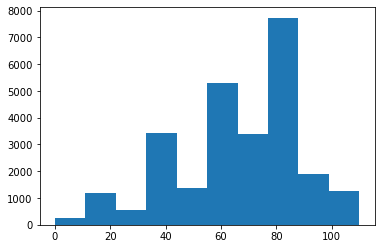

In [431]:
fig, ax = plt.subplots()
ax.hist(df_rt['rating_y']);

In [432]:
df_rt.dropna(subset=['box_office'], inplace=True)

In [433]:
def fresh(rating):
    if rating == 'fresh':
        return 1
    elif rating == 'rotten':
        return 0 

In [434]:
df_rt['fresh'] = df_rt['fresh'].apply(fresh)

In [435]:
df_rt['currency'].value_counts()

$    15686
Name: currency, dtype: int64

In [436]:
df_rt['rating_y'] = df_rt.groupby('id')['rating_y'].transform(
    lambda grp: np.mean(grp)
)

In [445]:
df_rt = df_rt.drop_duplicates(subset='id')

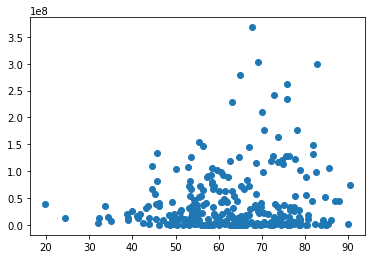

In [450]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);

0                       Drama|Science Fiction and Fantasy
318                                                Comedy
427                                                 Drama
521                                                 Drama
726                                                 Drama
                               ...                       
53572    Action and Adventure|Art House and International
53718    Action and Adventure|Science Fiction and Fantasy
53887                                        Comedy|Drama
53892            Art House and International|Comedy|Drama
54175    Action and Adventure|Horror|Mystery and Suspense
Name: genre, Length: 299, dtype: object